# Chargement des données :

Pour le projet **DeepLearning**, On classifie des affiches de films associées aux 9 labels suivants : **crime**, **documentary**, **family**, **history**, **horror**, **romance**, **science-fiction**, **war**, **western**.

Les images sont dans le dossier **bdd** répartit en 3 dossiers: *train*, *validation* et *test*. Chacun de ces dossiers comporte un sous-dossier par classe, qui contient les images correspondantes. L'arborescence est disponible sur le [github du projet](https://github.com/GeogeoB/DeepLearning).

Nous pouvons donc faire **git clone** pour récupérer le projet et la base de données.

In [ ]:
!git clone https://github.com/GeogeoB/DeepLearning
path = "./DeepLearning/bdd/"

fatal: destination path 'DeepLearning' already exists and is not an empty directory.


Fonction pour charger les images dans une matrice X et les classes associées dans une matrice y.

In [ ]:

import os
import shutil

import numpy as np
import PIL
from PIL import Image
import os, sys
from scipy.io import loadmat


def load_data(data_path, classes, dataset='train', image_size=(64,64), max_par_categorie=150):
    image_sizeY = image_size[0]
    image_sizeX = image_size[1]
  
    num_images = 0
    for i in range(len(classes)):
        dirs = sorted(os.listdir(data_path + dataset + '/' + classes[i]))
        #num_images += len(dirs)
        num_images += min(max_par_categorie,len(dirs))
                                
    x = np.zeros((num_images, image_sizeY, image_sizeX, 3))
    y = np.zeros((num_images, ), dtype=np.uint8)
    
    current_index = 0
    
    # Parcours des différents répertoires pour collecter les images
    for idx_class in range(len(classes)):
        dirs = sorted(os.listdir(data_path + dataset + '/' + classes[idx_class]))
        #num_images += len(dirs)
        num_images += max_par_categorie
    
        # Chargement des images,
        #for idx_img in range(len(dirs)):
        for idx_img in range(min(max_par_categorie,len(dirs))):
            item = dirs[idx_img]
            if os.path.isfile(data_path + dataset + '/' + classes[idx_class] + '/' + item):
                # Ouverture de l'image
                img = Image.open(data_path + dataset + '/' + classes[idx_class] + '/' + item)
                # Conversion de l'image en RGB
                img = img.convert('RGB')
                # Redimensionnement de l'image et écriture dans la variable de retour x 
                img = img.resize((image_sizeX,image_sizeY))
                x[current_index] = np.asarray(img)/255.0
                # Écriture du label associé dans la variable de retour y
                y[current_index] = idx_class
                current_index += 1
                
    return x, y

Création des 3 matrices (X,y) associées aux 3 groupes *train*, *eval* et *test*.

In [ ]:
LABELS = ['crime', 'documentary', 'family', 'history', 'horror', 'romance', 'science-fiction', 'war', "western"]
NCLASS = len(LABELS)
IMAGE_SIZE = (345,230) # 345 pixel de haut, 230 de large
IMAGE_SIZE = (172,115)

x_train, y_train = load_data(path, LABELS, dataset='Apprentissage', image_size=IMAGE_SIZE)
print("Taille X_train:", x_train.shape, "Taille y_train:", y_train.shape)

x_val, y_val = load_data(path, LABELS, dataset='Evaluation', image_size=IMAGE_SIZE)
print("Taille X_val:  ", x_val.shape, " Taille y_val:  ", y_val.shape)

x_test, y_test = load_data(path, LABELS, dataset='Test', image_size=IMAGE_SIZE)
print("Taille X_test: ", x_test.shape, " Taille y_test: ", y_test.shape)

Taille X_train: (1221, 172, 115, 3) Taille y_train: (1221,)
Taille X_val:   (264, 172, 115, 3)  Taille y_val:   (264,)
Taille X_test:  (264, 172, 115, 3)  Taille y_test:  (264,)


Mélanger les x et y pour éviter des problemes d'apprentissage

In [ ]:
ordre = list(range(x_train.shape[0]))
x_train = np.array([x_train[i,:,:,:] for i in ordre])
y_train = np.array([y_train[i] for i in ordre])

Afficher une image pour chacun des genres:

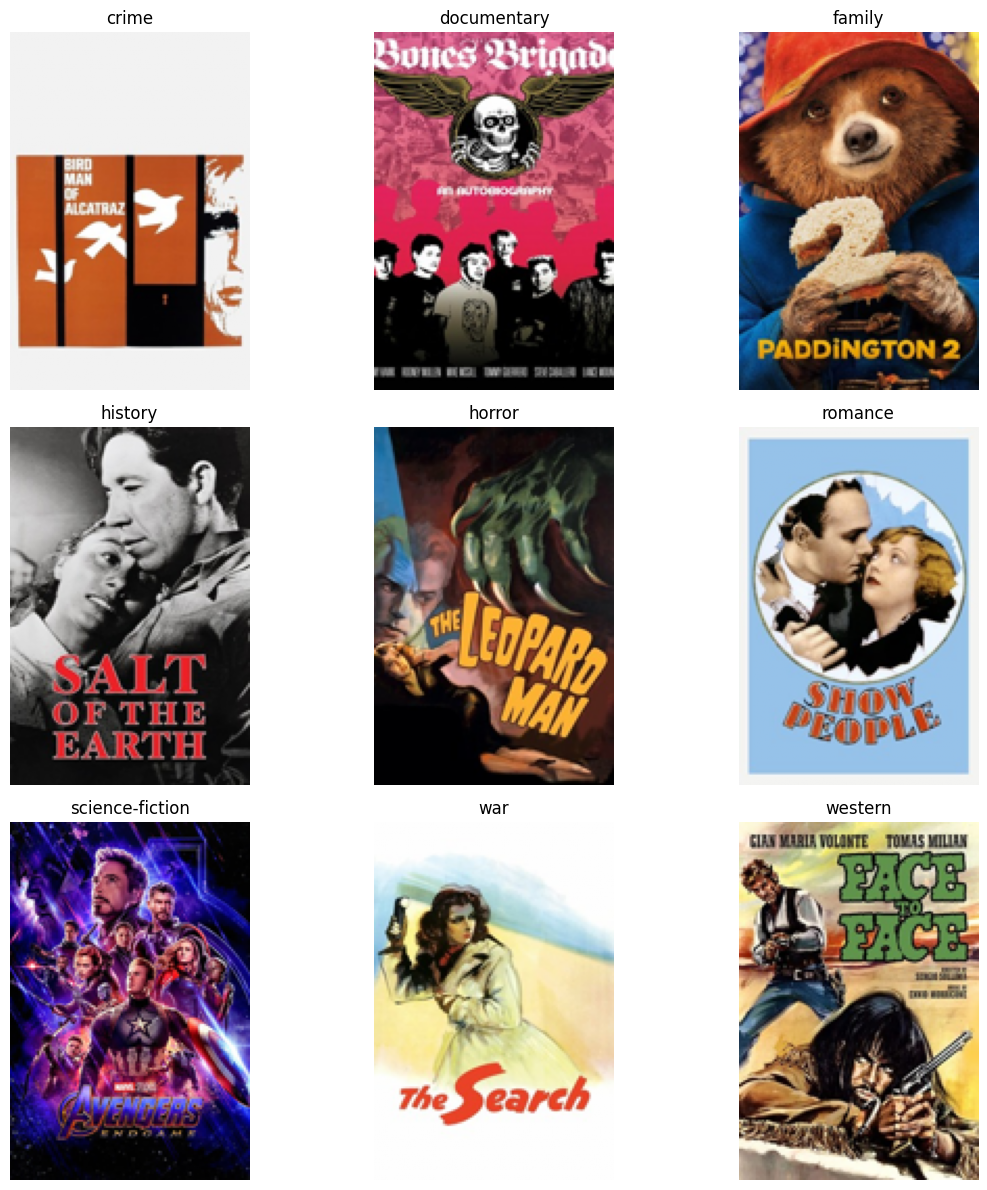

In [ ]:
import matplotlib.pyplot as plt
import random

# Dictionnaire pour associer chaque genre les indices dans x_train et y_train
genresIndices = {i: [] for i in range(NCLASS)}
for i, val in enumerate(y_train):
    genresIndices[val].append(i)

plt.figure(figsize=(12, 12))
random_indices = [random.choice(genresIndices[val]) for val in range(NCLASS)]
for i in range(0, NCLASS):
    plt.subplot(3, 3, i+1)
    # Enlever les axes
    plt.axis("off")
    image = x_train[random_indices[i]]
    plt.title(LABELS[y_train[random_indices[i]]])
    plt.imshow(image)

plt.tight_layout()
plt.show()

In [ ]:
def plot_training_analysis():
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  acc_top = history.history['top_k_categorical_accuracy']
  val_acc_top = history.history['val_top_k_categorical_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'b', linestyle="--",label='Training acc')
  plt.plot(epochs, val_acc, 'g', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()

  plt.figure()

  plt.plot(epochs, acc_top, 'b', linestyle="--",label='Training acc top 3')
  plt.plot(epochs, val_acc_top, 'g', label='Validation acc top 3')
  plt.title('Training and validation accuracy top 3')
  plt.legend()

  plt.figure()

  plt.plot(epochs, loss, 'b', linestyle="--",label='Training loss')
  plt.plot(epochs, val_loss,'g', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

train_datagen = ImageDataGenerator()

In [ ]:
from keras.api._v2.keras import regularizers
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras import optimizers

loss = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=False,
    ignore_class=None,
    name='sparse_categorical_crossentropy'
)
#train_generator = batch_generator(x_train, y_train, batch_size = 64)


model = Sequential()
model.add(tf.keras.Input(shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)))
model.add(Conv2D(128, 3, activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(256, 3, activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(384, 3, activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(512, 3, activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())    # "Mise à plat" (vectorisation) du tenseur pour permettre de la connecter à une couche dense  
model.add(Dropout(0.5))
model.add(Dense(512, 'relu', kernel_regularizer=regularizers.l2(l2=1.0)
))   # Couche dense, à 512 neurones
model.add(Dense(NCLASS, 'softmax'))   # Couche de sortie

model.summary()

model.compile(loss=loss,
              optimizer=optimizers.Adam(learning_rate=3e-4),
              metrics=['accuracy', tf.keras.metrics.TopKCategoricalAccuracy(k=3)])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 170, 113, 128)     3584      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 85, 56, 128)      0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 83, 54, 256)       295168    
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 41, 27, 256)      0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 39, 25, 384)       885120    
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 19, 12, 384)     

In [ ]:
history = model.fit(train_datagen.flow(x_train, y_train, batch_size=64), 
                    validation_data=(x_val, y_val),
                    epochs=40,
                    )
''' history = model.fit(x_train, y_train, batch_size=64, 
                    validation_data=(x_val, y_val),
                    epochs=20,
                    ) '''

Epoch 1/40
20/20 [==============================] - 11s 207ms/step - loss: 616.7565 - accuracy: 0.1278 - top_k_categorical_accuracy: 0.3579 - val_loss: 289.1771 - val_accuracy: 0.3030 - val_top_k_categorical_accuracy: 1.0000
Epoch 2/40
20/20 [==============================] - 4s 186ms/step - loss: 157.8967 - accuracy: 0.1343 - top_k_categorical_accuracy: 0.9844 - val_loss: 58.0660 - val_accuracy: 0.1061 - val_top_k_categorical_accuracy: 0.7727
Epoch 3/40
20/20 [==============================] - 4s 186ms/step - loss: 28.0315 - accuracy: 0.1220 - top_k_categorical_accuracy: 0.3702 - val_loss: 8.9690 - val_accuracy: 0.0795 - val_top_k_categorical_accuracy: 0.4091
Epoch 4/40
20/20 [==============================] - 4s 185ms/step - loss: 4.9107 - accuracy: 0.1540 - top_k_categorical_accuracy: 0.6880 - val_loss: 2.7179 - val_accuracy: 0.2424 - val_top_k_categorical_accuracy: 0.0000e+00
Epoch 5/40
20/20 [==============================] - 4s 204ms/step - loss: 2.4322 - accuracy: 0.1826 - top_k

' history = model.fit(x_train, y_train, batch_size=64, \n                    validation_data=(x_val, y_val),\n                    epochs=20,\n                    ) '

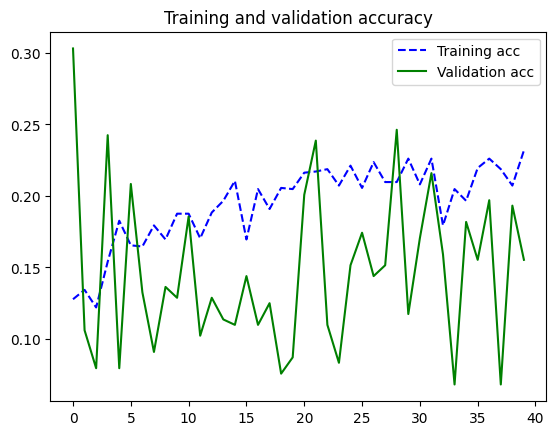

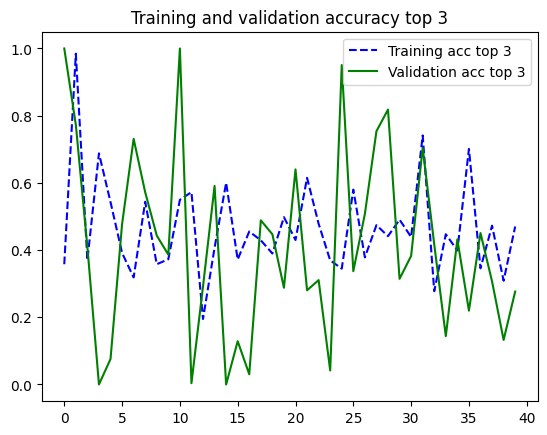

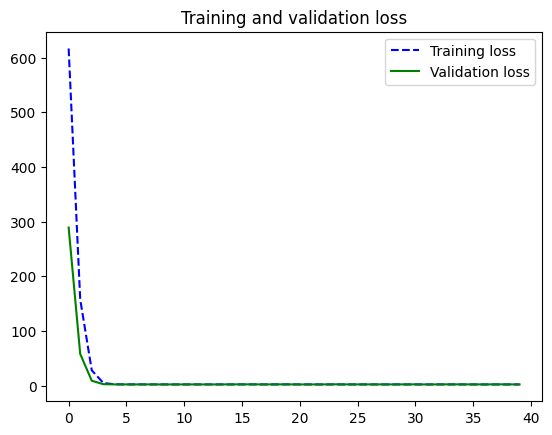

In [ ]:
plot_training_analysis()

9/9 [==============================] - 0s 34ms/step


<Axes: >

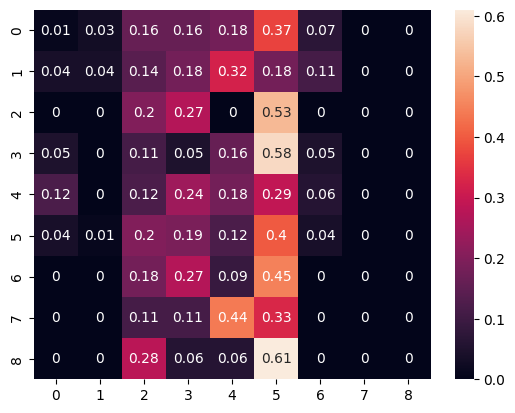

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_prediction = model.predict(x_val)
y_prediction = np.argmax (y_prediction, axis = 1)
#Create confusion matrix and normalizes it over predicted (columns)
result = confusion_matrix(y_val, y_prediction, normalize="true").round(2)
sns.heatmap(result, annot=True)

In [ ]:
incorrect_indices = np.nonzero(y_prediction != y_val)[0]
bonnes_indices = np.nonzero(y_prediction == y_val)[0]

In [ ]:
incorrect_indices

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106,
       108, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121,
       122, 123, 125, 126, 127, 128, 129, 130, 131, 132, 133, 136, 137,
       139, 140, 141, 142, 143, 144, 145, 146, 148, 150, 151, 152, 153,
       154, 155, 157, 158, 159, 162, 165, 169, 170, 173, 174, 175, 177,
       181, 182, 183, 186, 187, 189, 193, 194, 197, 198, 199, 200, 201,
       202, 204, 205, 207, 208, 209, 211, 214, 215, 217, 218, 21

In [ ]:
bonnes_indices

In [ ]:
item = incorrect_indices[2]

plt.imshow(x_val[item])
plt.show()
print("vrai : " + LABELS[y_val[item]] + ", ", "prédiction : " + LABELS[y_prediction[item]])

In [ ]:
item = bonnes_indices[1]

plt.imshow(x_val[item])
plt.show()
print("vrai : " + LABELS[y_val[item]] + ", ", "prédiction : " + LABELS[y_prediction[item]])